In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
cdf = pd.read_pickle('data.pkl')
cdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86785 entries, 0 to 86784
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 86785 non-null  datetime64[ns]
 1   country                              86785 non-null  object        
 2   confirmed                            86785 non-null  float64       
 3   deaths                               86785 non-null  float64       
 4   recovered                            86785 non-null  float64       
 5   active                               86785 non-null  float64       
 6   dailyConf                            86564 non-null  float64       
 7   dailyDeath                           86564 non-null  float64       
 8   dailyRec                             86564 non-null  float64       
 9   total_vaccinations                   10629 non-null  float64       
 10  people_vac

In [ ]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
Cropcdf = cdf[cdf['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

Cropcdf = Cropcdf.merge(populations, on=['country'])
Cropcdf['daily_confirmed_per_hundred'] = Cropcdf['dailyConf'] / Cropcdf['population'] * 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(data=Cropcdf,
             x='daily_confirmed_per_hundred', 
             bins=25,
             kde=True, 
             ax=axes[0]);
axes[0].set_title('daily confirmed per hundred histogram', fontsize=16)
sns.histplot(data=Cropcdf, 
             x='daily_confirmed_per_hundred',
             y='country', 
             bins=25, 
             color='red',
             ax=axes[1]);

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(data=Cropcdf,
                      y= 'country', 
                      x= 'deathRate', 
                      orient='h', 
                      width=0.9)
boxplot.set_title('Распределение летальности по странам',);
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

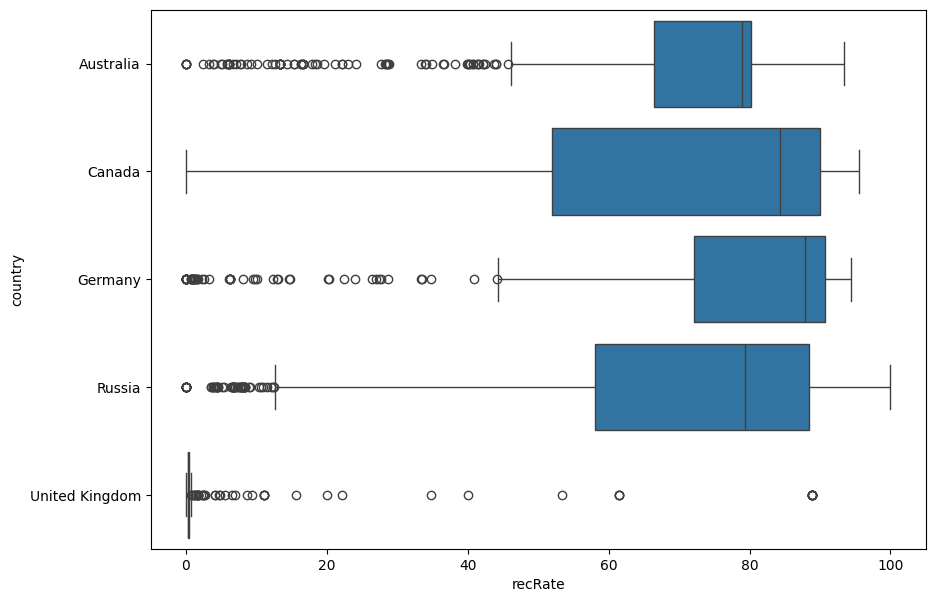

In [24]:
fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(data=Cropcdf,
                      x='recRate', 
                      y='country',
                      orient='h')

In [ ]:
fig = plt.figure(figsize=(10, 7))
Cropcdf['quarter'] = Cropcdf['date'].dt.quarter
barplot = sns.barplot(data=Cropcdf, 
                      x='country', 
                      y = 'daily_confirmed_per_hundred', 
                      hue='quarter',)
barplot.set_title('mean percent of confirmed in quarter');

In [ ]:
jointplot = sns.jointplot(
    data = Cropcdf, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim=(0, 40),
    ylim=(0, 0.1),
    height=8,
)

In [ ]:
pivot = Cropcdf.pivot_table(
    values= 'people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
pivot

In [ ]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Vaccination heatmap', fontsize=16)

Text(0.5, 1.0, 'Just heamap')

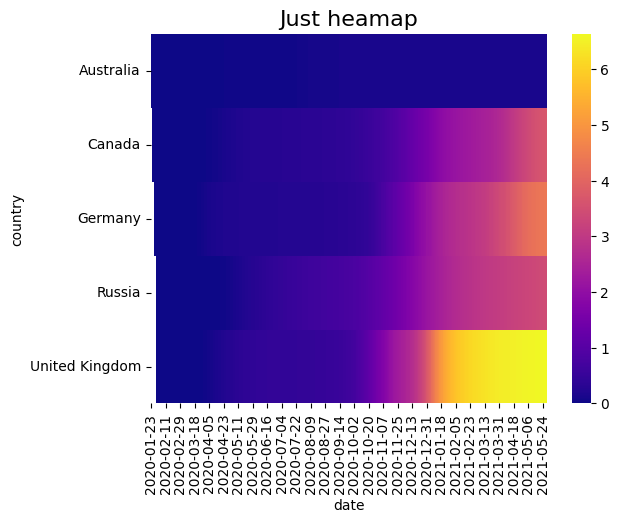

In [20]:
Cropcdf['confirmed_per_hundred'] = Cropcdf['confirmed'] / Cropcdf['population'] * 100
Cropcdf['confirmed_per_hundred']

cph = Cropcdf.pivot_table(values='confirmed_per_hundred', 
                          columns='date', 
                          index='country'
)
cph.columns = cph.columns.astype('string')

heat = sns.heatmap(data=cph, cmap='plasma')
heat.set_title('Just heamap', fontsize=16)